![title](images/gmit.PNG)

## GMIT HDip Data Analytics 2019
## Fundamentals of Data Analysis - Semester 2 - Assignment 1
## Thomas Healy G00376351

![title](images/numpya.PNG) 

## Table of contents

#### 1. Description of the assignment and selection of real world phenomenon
#### 2. Investigation of phenonmenon's variables
#### 3. Synthesis a dataset
#### 4. Detail research and implement the simulation

# 1. Description of assignment and selection of real world phenomenon

The assignment is re-create a real world phenonmenon using the ```numpy.random``` package to model the distributions in the phenomenon I have chosen. The phenonmenon I have chosen is that of HR data. The IBM dataset is a popular dataset that IBM developed to allow machine learning be ran on relatively large (1470 rows with 35 columns). It is a contrived datset as there are serious privacy and ethical issues surrounding the use of 'real' HR data in data science. I have selected this phenomenon as working in HR it can be difficult to find datasets that are relevant and generating my own dataset will be very handy as it can be used for HR or people Analytics purposes. I propose to take a few columns below and plot their distribution and then change some of them and build our own dataset based of that.

As HR has adopted a more data centric mindset, I think HR Generalists should have a good grounding in understanding the data they are guardians for in an organisation. 

The data(camelCase) that will make up our datatset are :

* EmployeeID
* Age
* Gender
* CommuteDist
* SatisfactionLevel
* MonthlyHours
* Department
* Salary
* TimeSincePromo
* Tenure 
* Manager
* PerformanceReview
* Churn

In [857]:
#Import our Packages, tell jupyter we want our plot inline and set the grid style in seaborn for more contrast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from pylab import rcParams
#rcParams['figure.figsize'] = (8, 5)
#import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
import seaborn as sns
sns.set_style("darkgrid")

# 2. Investigation of phenonmenon's variables

I will print some decriptive stats here to give us some guidelines of the data we need to re-create. This should take care of the numercial data. I will use countplots to understand the distribution of the categorical variable. 

In [858]:
df = pd.read_csv('IBMHRdata_set.csv')

In [859]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [860]:
print(df.info())
df[['DistanceFromHome','JobSatisfaction','MonthlyIncome', 'PerformanceRating','YearsAtCompany', 'YearsSinceLastPromotion','Age', 'JobSatisfaction']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,DistanceFromHome,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,YearsSinceLastPromotion,Age,JobSatisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,9.192517,2.728571,6502.931293,3.153741,7.008163,2.187755,36.923810,2.728571
std,8.106864,1.102846,4707.956783,0.360824,6.126525,3.222430,9.135373,1.102846
min,1.000000,1.000000,1009.000000,3.000000,0.000000,0.000000,18.000000,1.000000
25%,2.000000,2.000000,2911.000000,3.000000,3.000000,0.000000,30.000000,2.000000
50%,7.000000,3.000000,4919.000000,3.000000,5.000000,1.000000,36.000000,3.000000
75%,14.000000,4.000000,8379.000000,3.000000,9.000000,3.000000,43.000000,4.000000
max,29.000000,4.000000,19999.000000,4.000000,40.000000,15.000000,60.000000,4.000000


We have some descriptive information that we can use to plug into our random functions. I am going to change some them though. For instance, Monthly Income, will be change to something more realistic. I will use plots to understand the shape of the data. I will go through each var in turn and then re-create a simliar var for our data set. We will have 13 columns and some will be new such as Churn.

In [861]:
#df.profile_report() Was going to use this command but it involved updating Anaconda and I didnt want to risk it

### 2.2 Plots of Variables

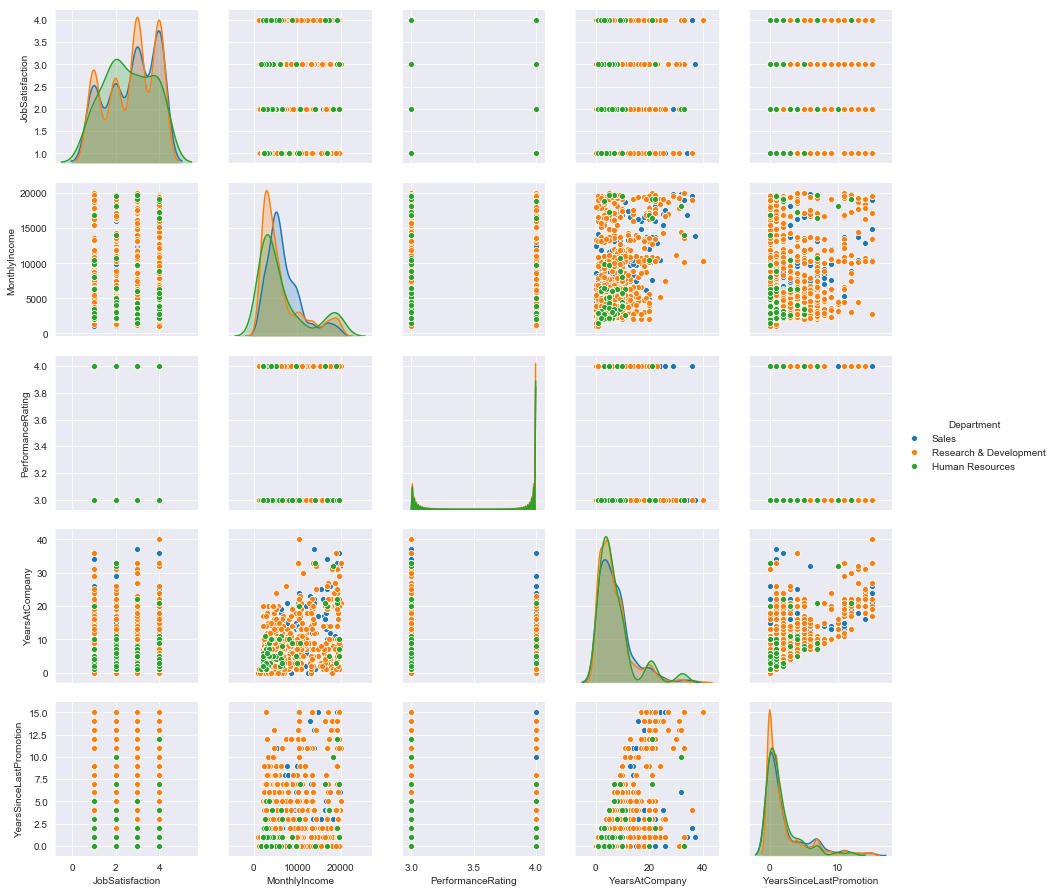

In [862]:
sns.pairplot(df,hue='Department',vars=['JobSatisfaction', 'MonthlyIncome', 'PerformanceRating','YearsAtCompany', 'YearsSinceLastPromotion'])

### Age

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

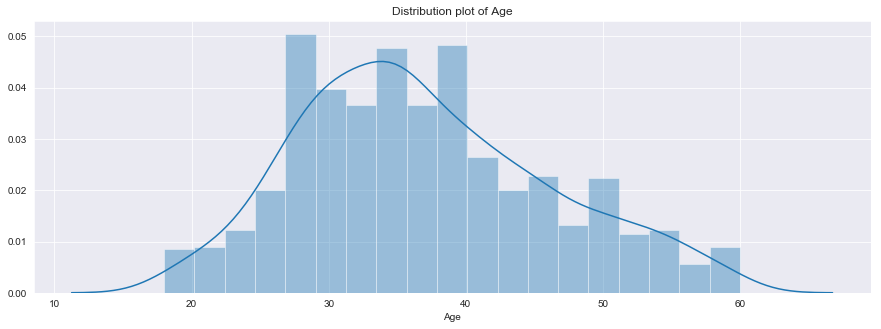

In [863]:
print(sns.distplot(df['Age']))
plt.title('Distribution plot of Age')
plt.show

### Gender

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

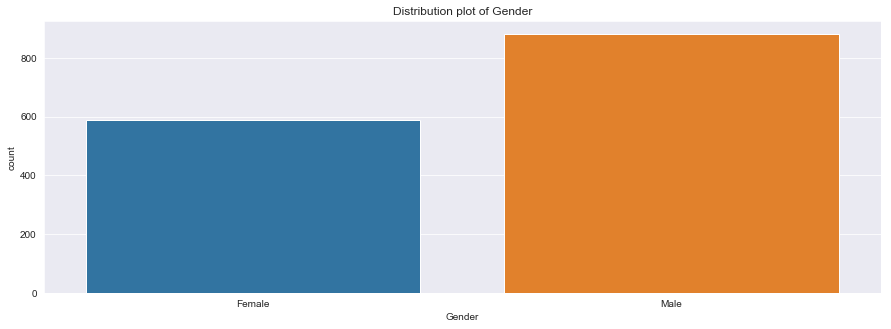

In [864]:
print(sns.countplot(df['Gender']))
plt.title('Distribution plot of Gender')
plt.show

### Commute

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

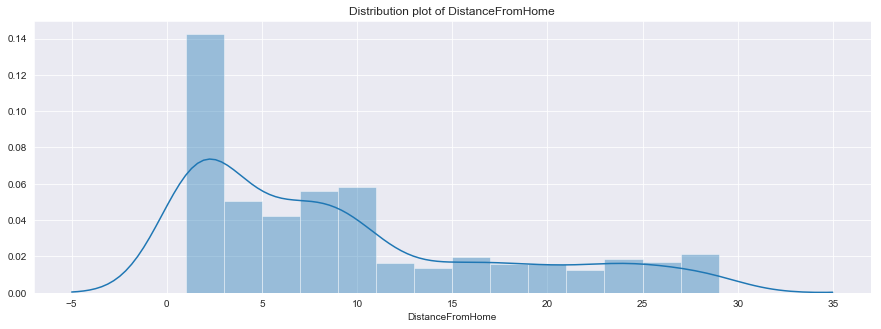

In [865]:
print(sns.distplot(df['DistanceFromHome']))
plt.title('Distribution plot of DistanceFromHome')
plt.show

### Job Satisfaction

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

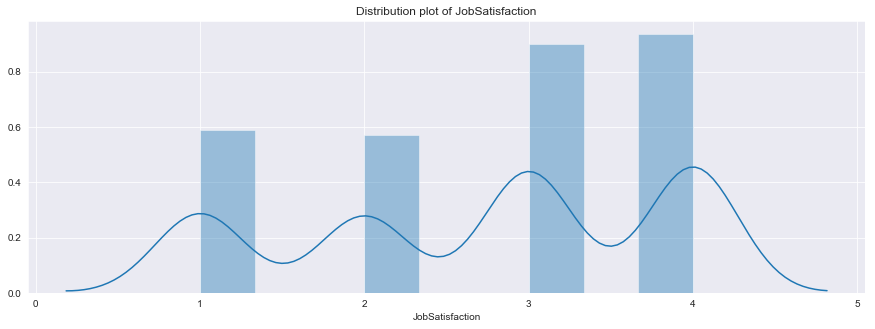

In [866]:
print(sns.distplot(df['JobSatisfaction']))
plt.title('Distribution plot of JobSatisfaction')
plt.show

### Hours Worked

AxesSubplot(0.125,0.125;0.775x0.755)


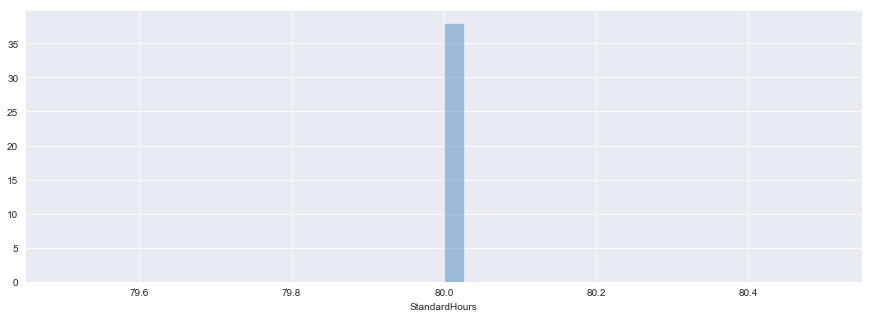

In [867]:
print(sns.distplot(df['StandardHours']))

Hmm this looks a bit suspicious so I think we will adopt a more realistic approach monthly hours. I am going to choose the normal distribution as it most closely describes the hour data I have seen in HR departments. 

### Department

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

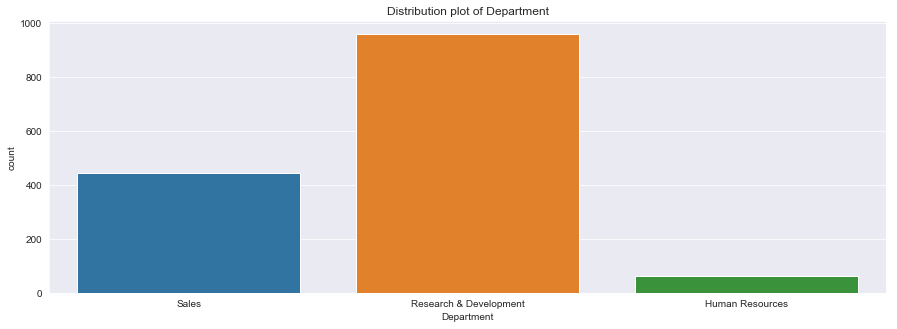

In [868]:
print(sns.countplot(df['Department']))
plt.title('Distribution plot of Department')
plt.show

###  Monthly Income

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

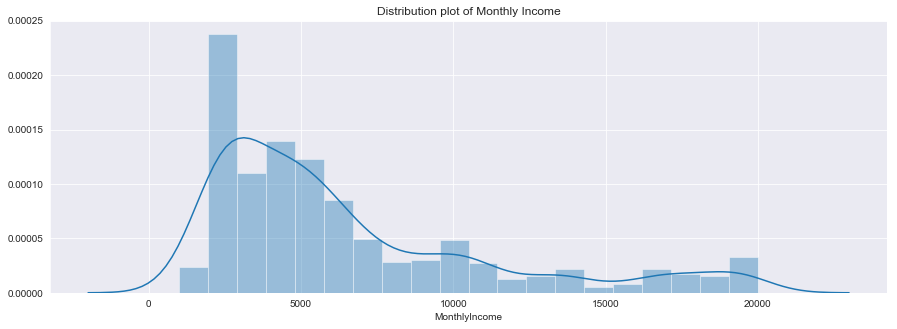

In [869]:
print(sns.distplot(df['MonthlyIncome']))
plt.title('Distribution plot of Monthly Income')
plt.show

### Time since most recent promotion

### Years since last Promotion

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

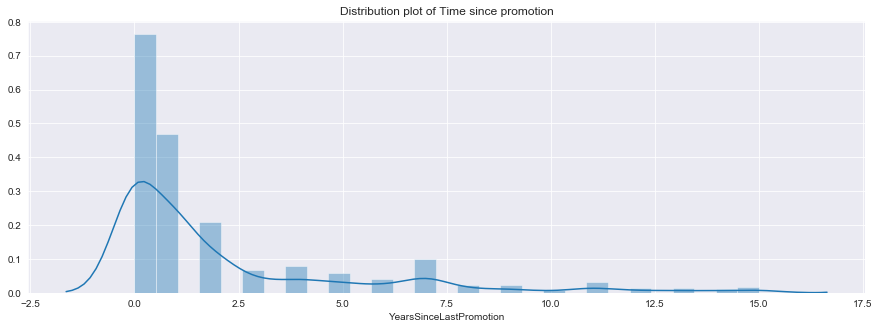

In [870]:
print(sns.distplot(df['YearsSinceLastPromotion']))
plt.title('Distribution plot of Time since promotion')
plt.show

In [871]:
df['YearsSinceLastPromotion'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

### Years at Company  (Tenure)

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

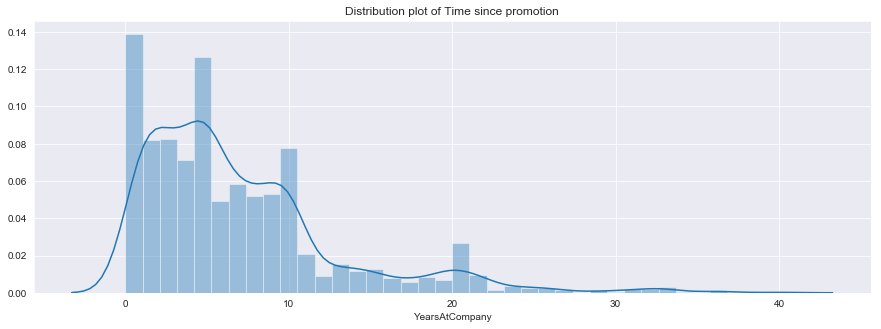

In [872]:
print(sns.distplot(df['YearsAtCompany']))
plt.title('Distribution plot of Time since promotion')
plt.show

### Manager

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

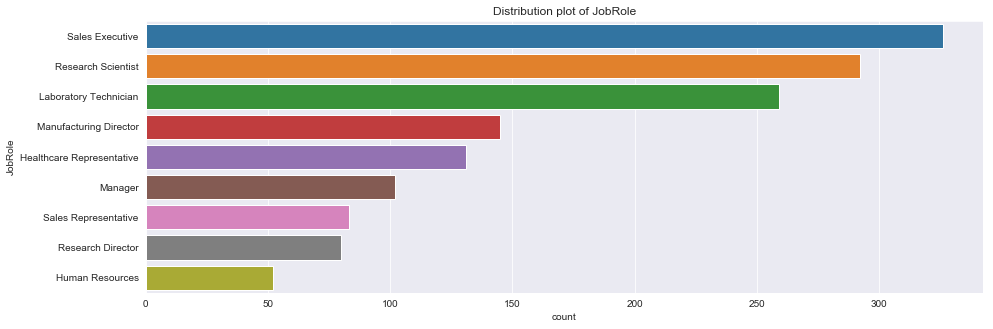

In [873]:
y1 =df['JobRole']
print(sns.countplot(y=y1, data=df))
plt.title('Distribution plot of JobRole')
plt.show

In [874]:
y1.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

According to the above counts we have 102 managers in a company of 1470. So for our dataset, we will take the figure of 6.9% and use this to randomly assign the manager title to our workforce. 

### Performance Rating

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

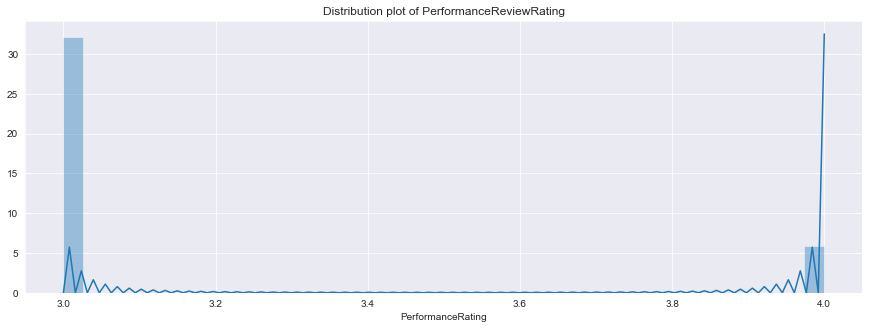

In [875]:
print(sns.distplot(df['PerformanceRating']))
plt.title('Distribution plot of PerformanceReviewRating')
plt.show

So this looks suspicious also. We only have two values in the Performance review rating. I am going to re-create this with normal distribution. 

So we now understand the distributions and properties of our variables. We will now take this understanding and where applicable we will add it to our generated data.

# 3. Synthesis a dataset 

We can create a new dataset in a number of ways. We can generate our data by creating our dataframe and then assign the values we create later for our variables to those cells. Alternatively, we can create our variables and then combine them to create our dataset.

In [876]:
print(df.head)

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        

For the assignment, I am going to create a dataset that will hold 750 records for Aero-Tech. I am going to create a dataset with 13 variables modelled of the preceding variable. I will be making changes where I think the contrived data does not align with the observed real world phenomenon.

### 3.1 Create our Dataframe

In [877]:
# Let's create our dataframe
df1 = pd.DataFrame(columns=['EmployeeID',  'Age', 'Gender', 'Commute', 'SatisfactionLevel', 'WeeklyHours','Department', 'Salary','Tenure'])

In [878]:
print(df1.head())
print(df1.describe())

Empty DataFrame
Columns: [EmployeeID, Age, Gender, Commute, SatisfactionLevel, WeeklyHours, Department, Salary, Tenure]
Index: []
        EmployeeID  Age  Gender  Commute  SatisfactionLevel  WeeklyHours  \
count            0    0       0        0                  0            0   
unique           0    0       0        0                  0            0   

        Department  Salary  Tenure  
count            0       0       0  
unique           0       0       0  


### 3.2 Create our variables

Having created our dataframe, we will now create our variables and then combine them in the the dataframe we created.  

#### 3.2.1 EmployeeID

In [879]:
#Our employee ID is going to be a sequence to uniquely identify our employee
EmpID = np.arange(1, 751)

In [880]:
df1['EmployeeID'] = EmpID

#### 3.2.2 Age

In [881]:
mu, sigma = 36.9, 9.1
age = np.random.normal(mu, sigma, size=750)

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

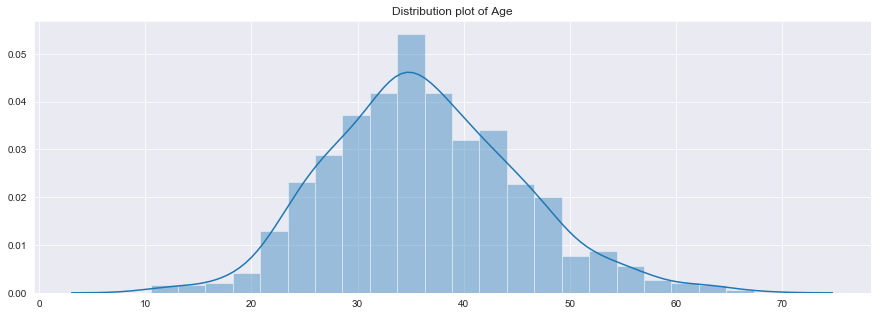

In [882]:
print(sns.distplot(age))
plt.title('Distribution plot of Age')
plt.show

In [883]:
print("The mean is ",(age.mean()).round(2))
print("The std is ",(age.std()).round(2))
print("The min is ",(age.min()).round(2))
print("The max is ",(age.max()).round(2))

The mean is  36.3
The std is  8.92
The min is  10.49
The max is  67.34


#### 3.2.3 Gender

In [884]:
x = ['Female','Male']
gen = np.random.choice(x,p=[0.32, 0.68], size = 750)

AxesSubplot(0.125,0.125;0.775x0.755)


<function matplotlib.pyplot.show(*args, **kw)>

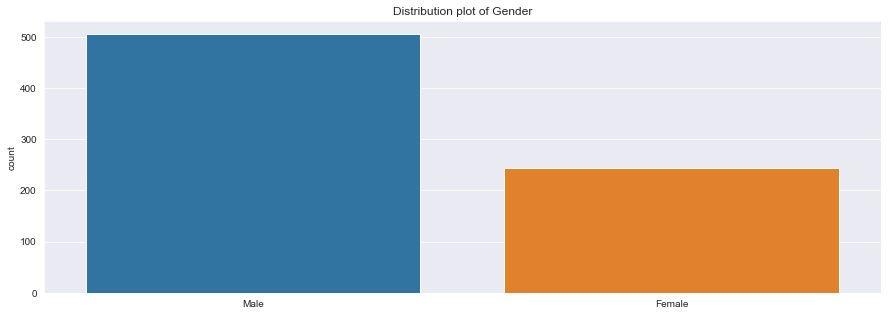

In [885]:
print(sns.countplot(gen))
plt.title('Distribution plot of Gender')
plt.show

In [886]:
df1['Gender'] = gen

#### 3.2.4 CommuteDist

In [887]:
np.random.seed(12)
Comm = np.random.gamma(.9, 15,  750)

<function matplotlib.pyplot.show(*args, **kw)>

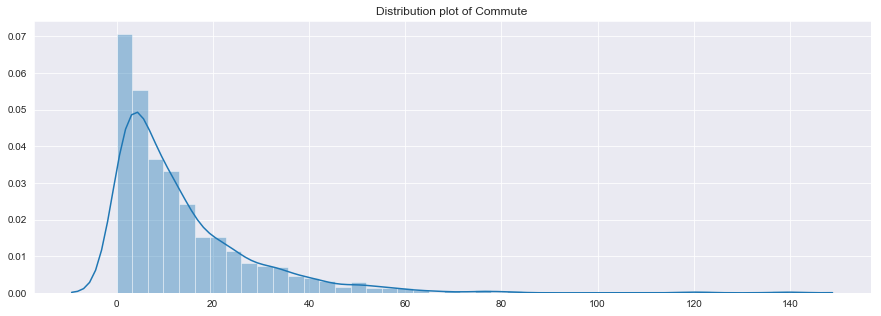

In [888]:
sns.distplot(Comm)
plt.title('Distribution plot of Commute')
plt.show

In [889]:
print("The mean is ",(Comm.mean()).round(2))
print("The std is ",(Comm.std()).round(2))
print("The min is ",(Comm.min()).round(2))
print("The max is ",(Comm.max()).round(2))

The mean is  13.52
The std is  14.64
The min is  0.01
The max is  139.5


In [890]:
df1['Commute'] = Comm

#### 3.2.5 Satisfaction Level

In [891]:
ratings1 = ['0','1','2', '3', '4']
ratings2 = np.random.choice(ratings1,p=[0,.2,0.5, 0.2,0.1], size = 750)

<function matplotlib.pyplot.show(*args, **kw)>

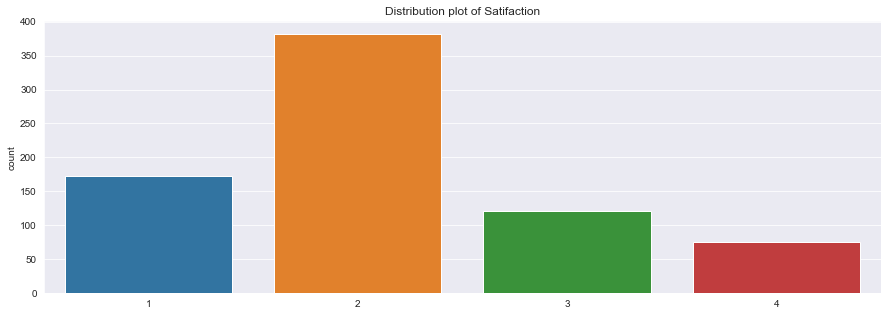

In [892]:
sns.countplot(ratings2)
plt.title('Distribution plot of Satifaction')
plt.show

In [893]:
df1['SatisfactionLevel'] = ratings2 

#### 3.2.6 Hour Worked

In [894]:
mu, sigma = 37.5, .8
hours = np.random.normal(mu, sigma, size=750)

<function matplotlib.pyplot.show(*args, **kw)>

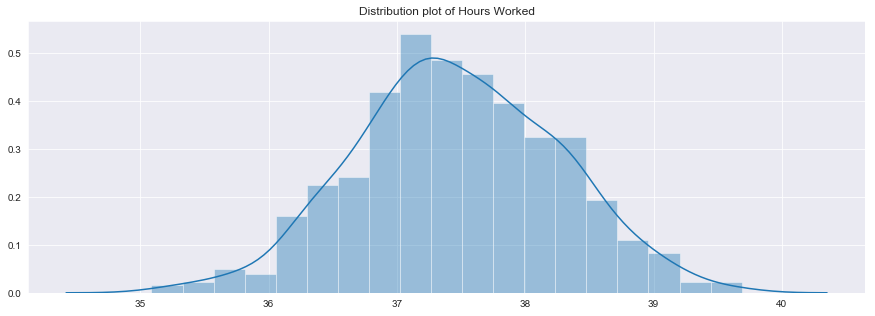

In [895]:
sns.distplot(hours)
plt.title('Distribution plot of Hours Worked')
plt.show

In [896]:
print("The mean is ",(hours.mean()).round(2))
print("The std is ",(hours.std()).round(2))
print("The min is ",(hours.min()).round(2))
print("The max is ",(hours.max()).round(2))

The mean is  37.47
The std is  0.79
The min is  35.09
The max is  39.69


In [897]:
df1['WeeklyHours'] = hours 

#### 3.2.7 Department

In [898]:
department = ['PeopleOps', 'Sales', 'CustomerSuccess', 'ProdDev']
depart = np.random.choice(department, p=[0.1, 0.3,0.3, 0.3],size=750)

<function matplotlib.pyplot.show(*args, **kw)>

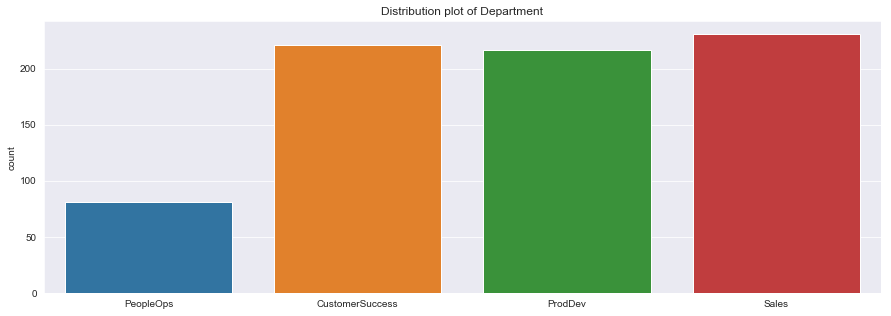

In [899]:
sns.countplot(depart)
plt.title('Distribution plot of Department')
plt.show

In [900]:
df1['Department'] = depart

#### 3.2.8 Salary

In [901]:
np.random.seed(12)
shape, scale = 3.0, 15
sal = np.random.gamma(shape, scale,  750)

<function matplotlib.pyplot.show(*args, **kw)>

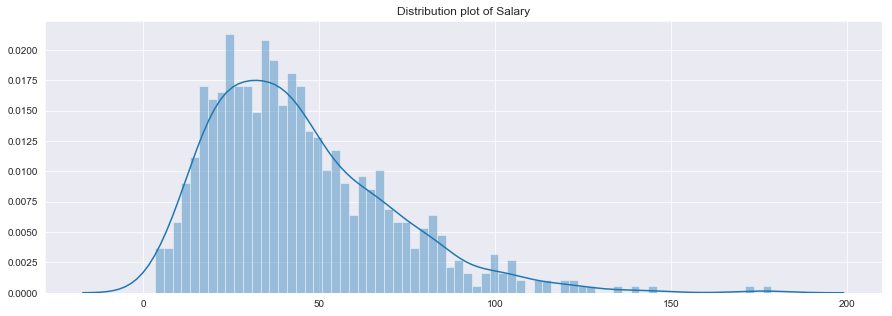

In [902]:
sns.distplot(sal,bins=70)
plt.title('Distribution plot of Salary')
plt.show

In [903]:
print("The mean is expressed in'000 € is" ,(sal.mean()).round(2)) 
print("The std is",(sal.std()).round(2))
print("The min is  expressed in'000 € is",(sal.min()).round(2))
print("The max is  expressed in'000 € is",(sal.max()).round(2))

The mean is expressed in'000 € is 44.41
The std is 25.53
The min is  expressed in'000 € is 3.39
The max is  expressed in'000 € is 178.5


In [904]:
df1['Salary'] = sal

#### 3.2.9 Time Since Promotion

In [905]:
np.random.seed(12)
#shape, scale = 1.1, 2.1
#tslp = np.random.gamma(shape, scale,  750)

tslp1 = ['0','1','2', '3', '5','6','7','8','9', '10','11','12', '13', '14','15']
tslp2 = np.random.choice(tslp1,p=[0.25, 0.15, 0.07, 0.11,0.05, 0.06, 0.06, 0.03,0.05, 0.05, 0.06, 0.02,0.00, 0.02, 0.02], size = 750)

<function matplotlib.pyplot.show(*args, **kw)>

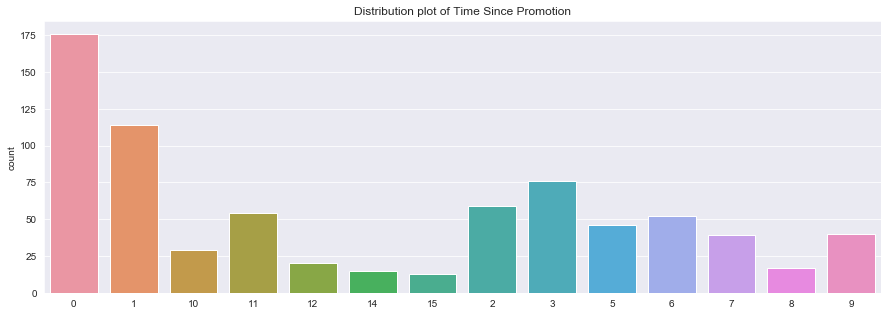

In [906]:
sns.countplot(tslp2)
plt.title('Distribution plot of Time Since Promotion')
plt.show

In [907]:
df1['TimeSincePromotion'] = tslp2

#### 3.2.10 Tenure

In [908]:
np.random.seed(12)
shape, scale = 1.35, 5.2
ten = np.random.gamma(shape, scale,  750)

<function matplotlib.pyplot.show(*args, **kw)>

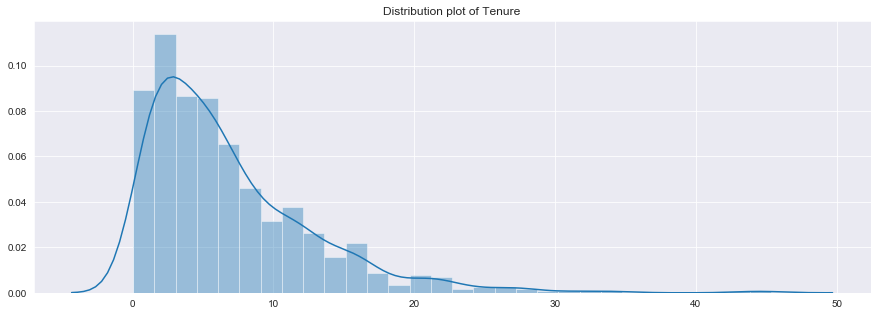

In [909]:
sns.distplot(ten)
plt.title('Distribution plot of Tenure')
plt.show

In [910]:
df1['Tenure'] = ten

In [911]:
print("The mean in years is" ,(ten.mean()).round(2)) 
print("The std is",(ten.std()).round(2))
print("The min is ",(ten.min()).round(2))
print("The max is ",(ten.max()).round(2))

The mean in years is 6.9
The std is 6.0
The min is  0.04
The max is  45.33


#### 3.2.11 Manager

In [912]:
man1 = ['Manager','IC']
man2 = np.random.choice(man1,p=[0.07, 0.93], size = 750)

<function matplotlib.pyplot.show(*args, **kw)>

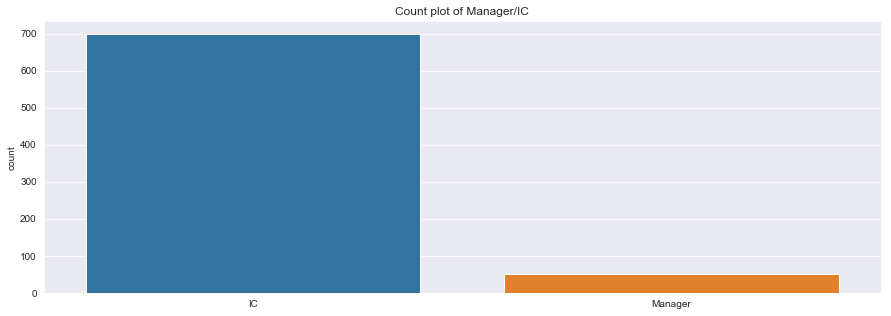

In [913]:
sns.countplot(man2)
plt.title('Count plot of Manager/IC')
plt.show

In [914]:
df1['Manager/IC'] = man2

#### 3.2.12 Performance Rating

So from our original dataset, the performance review data was odd. Normally in HR, you would have a 4,5 or 6 point scale to place people's performance on. The observation that only two points exist in the scale means that either they have a binary performance review process where if you are good you get a four or if you need to improve you get a 3, or something is wrong with our data. In either case I think we will use a 6 point scale for our review. 

We have two ways to map our distribution, we can use the normal curve or we can use a "power tail" or Parentian (Pareto) distribution. I think we will map both and discuss.

In [915]:
np.random.seed(12)
mu, sigma = 3.2, .7 #mean and std
PerRat = np.random.normal(mu, sigma, size=750)

<function matplotlib.pyplot.show(*args, **kw)>

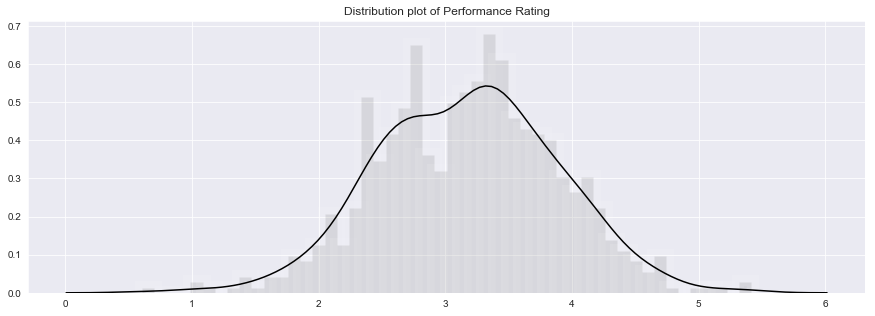

In [916]:
#Taken from https://www.datacamp.com/community/tutorials/probability-distributions-python
ax = sns.distplot(PerRat,
                  bins=50,
                  kde=True,
                  color='Black',
                  hist_kws={"linewidth": 15,'alpha':.1})
plt.title('Distribution plot of Performance Rating')
plt.show

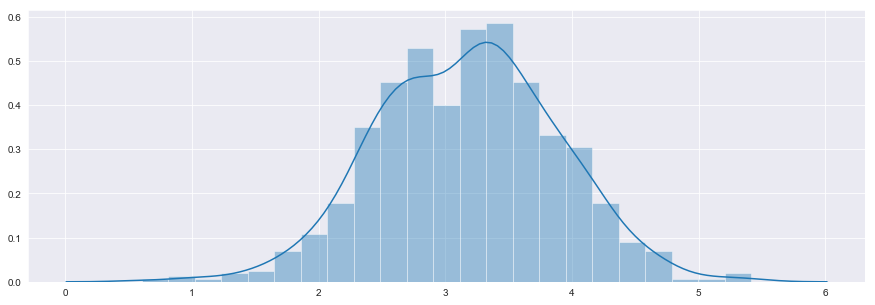

In [917]:
sns.distplot(PerRat)

In [918]:
print(PerRat.mean())
print(PerRat.std())
print(PerRat.min())
print(PerRat.max())

3.173724272980468
0.7051367070111626
0.6025243846672126
5.416589782792347


In [919]:
np.random.seed(12)
a, m = 11.36, 2.9  # shape and mode
PerRat2 = (np.random.pareto(a, 750) + 1) * m

<function matplotlib.pyplot.show(*args, **kw)>

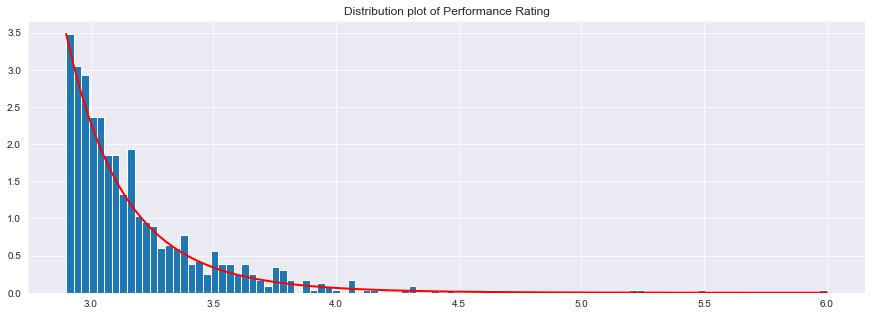

In [920]:
count, bins, _ = plt.hist(PerRat2, 100, density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.title('Distribution plot of Performance Rating')
plt.show

In [921]:
print("The mean is ",(PerRat2.mean()).round(2))
print("The std is ",(PerRat2.std()).round(2))
print("The min is ",(PerRat2.min()).round(2))
print("The max is ",(PerRat2.max()).round(2))

The mean is  3.19
The std is  0.33
The min is  2.9
The max is  6.0


In [922]:
df1['Performance Rating'] = PerRat2

#### 3.2.13 Churn

In [923]:
churn1 = ['Churned','Not-Churned']
churn2 = np.random.choice(churn1,p=[0.13, 0.87], size = 750)

<function matplotlib.pyplot.show(*args, **kw)>

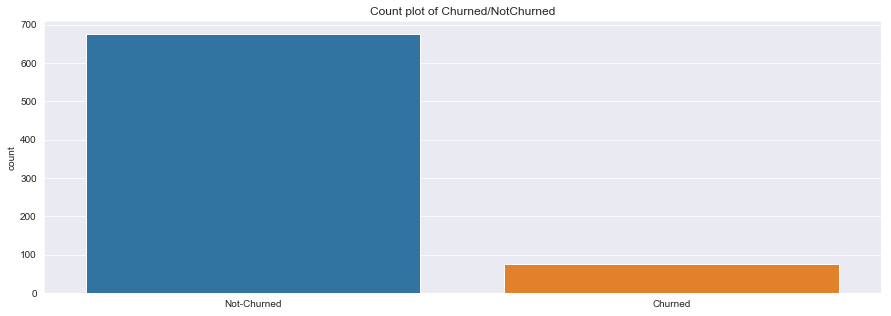

In [924]:
sns.countplot(churn2)
plt.title('Count plot of Churned/NotChurned')
plt.show

In [925]:
df1['Churned/Not-Churned'] = churn2

In [926]:
print((df1.describe()).round(2))

       EmployeeID  Commute  WeeklyHours  Salary  Tenure  Performance Rating
count      750.00   750.00       750.00  750.00  750.00              750.00
mean       375.50    13.52        37.47   44.41    6.90                3.19
std        216.65    14.65         0.79   25.54    6.01                0.33
min          1.00     0.01        35.09    3.39    0.04                2.90
25%        188.25     3.58        36.93   25.37    2.51                2.98
50%        375.50     9.19        37.43   39.88    5.31                3.09
75%        562.75    18.50        38.03   58.12    9.48                3.28
max        750.00   139.50        39.69  178.50   45.33                6.00


In [927]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
EmployeeID             750 non-null int32
Age                    0 non-null object
Gender                 750 non-null object
Commute                750 non-null float64
SatisfactionLevel      750 non-null object
WeeklyHours            750 non-null float64
Department             750 non-null object
Salary                 750 non-null float64
Tenure                 750 non-null float64
TimeSincePromotion     750 non-null object
Manager/IC             750 non-null object
Performance Rating     750 non-null float64
Churned/Not-Churned    750 non-null object
dtypes: float64(5), int32(1), object(7)
memory usage: 73.3+ KB
None


In [928]:
df1

,EmployeeID,Age,Gender,Commute,SatisfactionLevel,WeeklyHours,Department,Salary,Tenure,TimeSincePromotion,Manager/IC,Performance Rating,Churned/Not-Churned
0,1,NaN,Male,1.901662,3,36.921879,PeopleOps,52.740316,8.174589,0,IC,2.943058,Not-Churned
1,2,NaN,Female,3.649100,4,36.460965,CustomerSuccess,25.522603,2.458266,7,IC,3.265157,Not-Churned
2,3,NaN,Female,0.136664,3,36.937918,CustomerSuccess,61.429614,10.300298,1,IC,2.979072,Not-Churned
3,4,NaN,Male,47.764012,1,38.431467,ProdDev,12.954214,0.632066,3,IC,3.101473,Not-Churned
4,5,NaN,Female,4.018673,2,38.308884,Sales,40.125719,5.313594,0,Manager,2.903751,Not-Churned
5,6,NaN,Female,43.423278,1,37.108649,Sales,37.126718,4.681017,11,IC,3.617119,Not-Churned
6,7,NaN,Male,0.017221,2,38.389910,ProdDev,27.070662,2.730859,11,IC,3.553861,Not-Churned
7,8,NaN,Male,10.540201,2,36.280263,CustomerSuccess,52.724742,8.170882,0,Manager,2.908691,Not-Churned
8,9,NaN,Male,20.430832,2,36.997691,Sales,73.298771,13.366312,12,IC,3.825130,Not-Churned
9,10,NaN,Male,20.194341,1,38.540753,CustomerSuccess,17.007287,1.132114,0,Manager,2.937921,Not-Churned


In [929]:
print(df1.columns)

Index(['EmployeeID', 'Age', 'Gender', 'Commute', 'SatisfactionLevel',
       'WeeklyHours', 'Department', 'Salary', 'Tenure', 'TimeSincePromotion',
       'Manager/IC', 'Performance Rating', 'Churned/Not-Churned'],
      dtype='object')


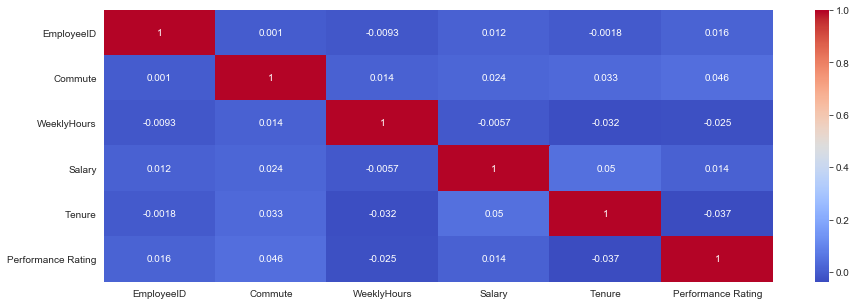

In [944]:
df1.corr()
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)
plt.show()

# 4. Detail research and implement the simulation 

## References

Albon, C,. __Machine Learning with Python Cookbook__

Burkon, A,. __The Hundred-Page Machine Learning Page__

Dell EMC Education Services, __Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data__

Hastie, T. Tibshirani, R. Friedman,J . __The Elements of Statistical Learning:Data Mining, Inference, and Prediction__

Grus, J., __Data Science From Scratch, First Principles with Python__

O’BOYLE JR, E,. AGUINIS, H,. __THE BEST AND THE REST: REVISITING THE NORM OF NORMALITY OF INDIVIDUAL PERFORMANCE: PERSONNEL PSYCHOLOGY__ 2012, 65, 79–119 Accessed [here](https://pdfs.semanticscholar.org/4213/613c2a55119eaa8a646d626f60d066e67ccf.pdf?_ga=2.103413186.377128525.1575537163-691422004.1569577689)

Kinney, W., __Python for Data Analysis__

James, J., Witten, D., Hastie, T., Tibshirani R., __An Introduction to Statistical Learning__

## Websites

https://towardsdatascience.com/probability-distributions-in-data-science-cce6e64873a7

https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.standard_t.html?highlight=student

https://bids.berkeley.edu/news/simple-random-sampling-not-so-simple

https://github.com/susanli2016

https://github.com/chrisalbon